# Monte Carlo Estimation: Computing Examples

Python versions of examples covered in this video in week 1, lesson 3.

Note that these examples are illustrative, you don't really need to simulate these distributions since analytical solutions are readily available. However, there exists distributions for which analytical solutions are not available and where Monte Carlo techniques are needed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

## Initialize Random Number Generator

So we can replicate the results across multiple runs.

In [2]:
np.random.seed(32)

## Example 1

Assume a random variable $\theta$ that follows a Gamma distribution with parameters a=2 and b=1/3. This Gamma distribution could represent the posterior distribution for $\theta$ if the data came from a Poisson distribution with mean $\theta$ and if we had used the conjugate Gamma prior.

### Generate samples from posterior

In [3]:
m = 100
a, b = 2, 1/3
theta = stats.gamma.rvs(a, scale=(1/b), size=m)

### Estimated vs True values

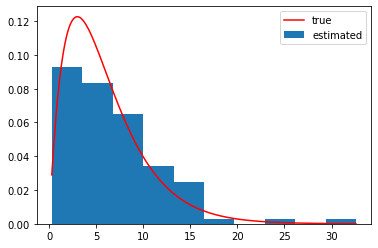

In [4]:
plt.hist(theta, density=True, label="estimated")
xs = np.arange(np.min(theta), np.max(theta), 0.1)
plt.plot(xs, stats.gamma.pdf(xs, a, scale=(1/b)), color="r", label="true")
plt.legend(loc="best")
plt.show()

In [5]:
mean_est = np.mean(theta)
mean_true = a / b
var_est = np.var(theta)
var_true = a / (b ** 2)
print("estimated mean: {:.5f}, variance: {:.5f}".format(mean_est, var_est))
print("     true mean: {:.5f}, variance: {:.5f}".format(mean_true, var_true))

estimated mean: 6.97022, variance: 27.57980
     true mean: 6.00000, variance: 18.00000


### Increase m for better estimate

In [6]:
m = 10000
theta = stats.gamma.rvs(a, scale=(1/b), size=m)
mean_est = np.mean(theta)
mean_true = a / b
var_est = np.var(theta)
var_true = a / (b ** 2)
print("estimated mean: {:.5f}, variance: {:.5f}".format(mean_est, var_est))
print("     true mean: {:.5f}, variance: {:.5f}".format(mean_true, var_true))

estimated mean: 6.08270, variance: 18.59604
     true mean: 6.00000, variance: 18.00000


### Probability that $\theta$ < 5

In [7]:
ind_theta = theta < 5
p_lt_5_est = np.mean(ind_theta)
p_lt_5_true = stats.gamma.cdf(5, a, scale=(1/b))
print("Pr(\u03b8 < 5) estimated: {:.3f}, true: {:.3f}".format(p_lt_5_est, p_lt_5_true))

Pr(θ < 5) estimated: 0.489, true: 0.496


### 90th Percentile (or 0.9 quantile)

In [8]:
pct_90_est = np.percentile(theta, 90)
# alternatively, can also use quantile function
# pct_90_est = np.quantile(theta, 0.9)
pct_90_true = stats.gamma.ppf(0.9, a, scale=(1/b))
print("90th percentile for \u03b8: estimated: {:.5f}, true: {:.5f}".format(pct_90_est, pct_90_true))

90th percentile for θ: estimated: 11.87775, true: 11.66916
